# Toggle Switch network

In [2]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.integrate as scint

Toggle switch system:
$$
\frac{dx_1}{dt} = \frac{a}{1 + x_2^b} - x_1 \\ 
\frac{dx_2}{dt} = \frac{a}{1 + x_1^b} - x_2
$$

In [3]:
def toggle_ode(t,x,a,b):
    x1=x[0] 
    x2=x[1]

    dx1dt=-x1 + a/(1+x2**b)
    dx2dt=-x2 + a/(1+x1**b)


    return np.array([dx1dt,dx2dt])

### Plotting the vector (arrow) field

***Define parameters! ***

In [3]:
a=10
b=10

Next, define t (needed for solve_ivp, so defined as input for toggle_ode), and then range of x1 and x2 values over which we'll make the plot.  

In [9]:
t=0   #MUST define a value of time for calling ode function above, even if it is not used in defining the ODE 

# define range of x1 and x2
x1min=0
x1max=a*2
numptsx1=12 # number of x1 points in grid
x1list=np.linspace(x1min,x1max,numptsx1)

x2min=0
x2max=a*2
numptsx2=12 #number of x2 points in grid
x2list=np.linspace(x2min,x2max,numptsx2)

Next, we are going to define a grid of x1 and x2 values, based on the lists
above. The (i,j) point on that grid will correspond to elements (i,j) in four matrices that we are about to make.
* x1 values increase across ROWS (horizontal direction, index j)
* x2 values increase down COLUMNS (vertical direction, index i)

In [10]:
x1array,x2array = np.meshgrid(x1list,x2list)
dx1dt_array=np.zeros(x1array.shape)
dx2dt_array=np.zeros(x1array.shape)

Compute vector field at these points

In [27]:
for i in np.arange(numptsx1):
    for j in np.arange(numptsx2):
        
        #here, F is an array of velocities in x1 and x2 directions    
        F=toggle_ode(t,[x1array[i,j],x2array[i,j]],a,b)

        #We fill in these two matrices with the corresponding velocities
        dx1dt_array[i,j]=F[0]
        dx2dt_array[i,j]=F[1]

Plot!

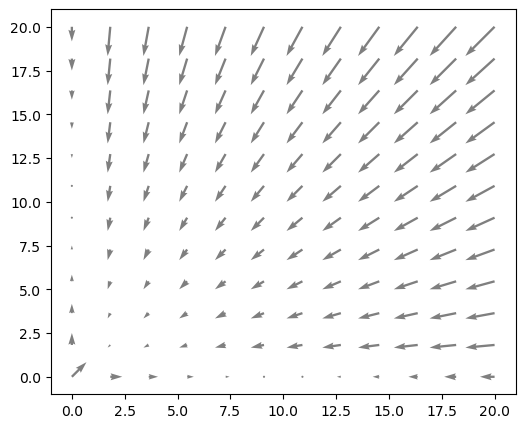

In [56]:
fig = plt.figure(figsize=(6,5))
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array,alpha=0.5) # quiver: plots vector field

### Add nullclines

In [65]:
# need finer grid for plotting nullclines
x1list_fine=np.linspace(x1min,x1max,250)
x2list_fine=np.linspace(x2min,x2max,250)


x2_nullcline_list=a/(1+x1list_fine**b) ;
x1_nullcline_list=a/(1+x2list_fine**b) ;

Plot!

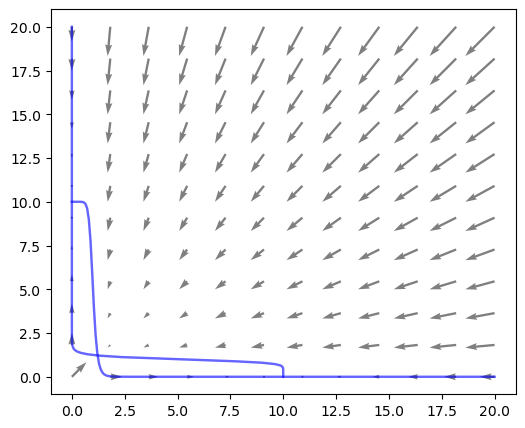

In [67]:
fig = plt.figure(figsize=(6,5))
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array,alpha=0.5) # quiver: plots vector field

# plot nullclines
plt.plot(x1list_fine,x2_nullcline_list,'b-',alpha=0.6,linewidth = 1.75)
plt.plot(x1_nullcline_list,x2list_fine,'b-',alpha=0.6,linewidth = 1.75)

#### Breakout groups: plotting nullclines (~ 5 minutes)

Fix $b = 2$, and plot the nullclines (no need to plot the vector field as well) for $a = 1,2, 3$. How do the nullclines and their intersections change?

Now fix $a = 1.5$, and repeat for $b = 2, 3, 4$.

In [4]:
# Fix array for nullclines, no need to recreate for each parameter values
x1list_fine=np.linspace(0,10,250)
x2list_fine=np.linspace(0,10,250)

In [5]:
a = 1 
b = 2
x2_nullcline_list=a/(1+x1list_fine**b) ;
x1_nullcline_list=a/(1+x2list_fine**b) ;

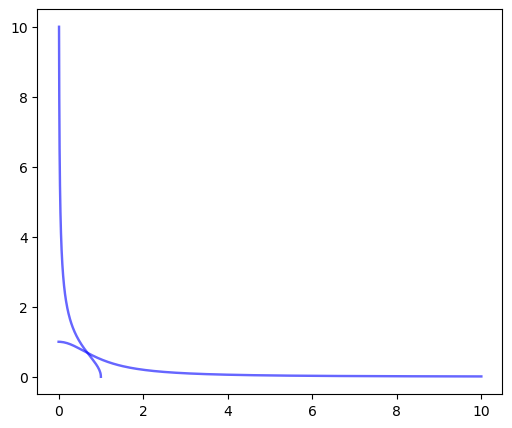

In [6]:
fig = plt.figure(figsize=(6,5))

# plot nullclines
plt.plot(x1list_fine,x2_nullcline_list,'b-',alpha=0.6,linewidth = 1.75)
plt.plot(x1_nullcline_list,x2list_fine,'b-',alpha=0.6,linewidth = 1.75)

We see that the nullclines have three intersections either when $a$ is sufficiently large compared to $b$, or when $b$ is sufficiently large compared to $a$. Else, they only have one intersection.

### Solving the ODE via scipy integrate module, which we imported above

We pass a time range, initial condition, and evaluation  time list into solve_ivp as follows

In [7]:
# back to these parameters
a=10
b=10

#specify our initial condition
x0=np.array([7,10])

#specify trange, a time range for simulation: two element array
tstart=0
tend=10
trange=np.array([tstart,tend])

#specify tlist,  a list of time points at which want to return the solution
numt=100
tlist=np.linspace(tstart,tend,numt)

sol=scint.solve_ivp(toggle_ode, trange, x0, t_eval=tlist,args=(a,b))

In [11]:
# re-generate flow and nullclines
t=0
# define range of x1 and x2
x1min=0
x1max=a*2
numptsx1=12 # number of x1 points in grid
x1list=np.linspace(x1min,x1max,numptsx1)

x2min=0
x2max=a*2
numptsx2=12 #number of x2 points in grid
x2list=np.linspace(x2min,x2max,numptsx2)

x1array,x2array = np.meshgrid(x1list,x2list)
dx1dt_array=np.zeros(x1array.shape)
dx2dt_array=np.zeros(x1array.shape)

for i in np.arange(numptsx1):
    for j in np.arange(numptsx2):
        
        #here, F is an array of velocities in x1 and x2 directions    
        F=toggle_ode(t,[x1array[i,j],x2array[i,j]],a,b)

        #We fill in these two matrices with the corresponding velocities
        dx1dt_array[i,j]=F[0]
        dx2dt_array[i,j]=F[1]
        
# need finer grid for plotting nullclines
x1list_fine=np.linspace(x1min,x1max,250)
x2list_fine=np.linspace(x2min,x2max,250)


x2_nullcline_list=a/(1+x1list_fine**b) ;
x1_nullcline_list=a/(1+x2list_fine**b) ;

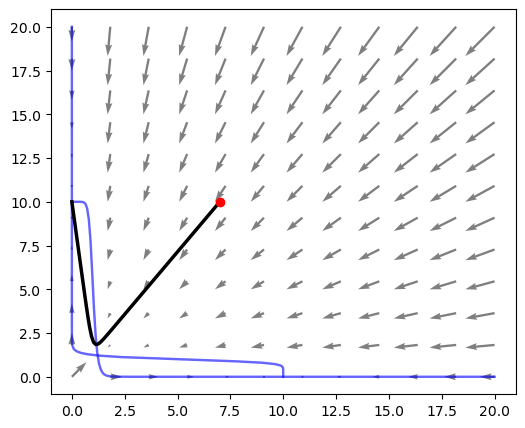

In [13]:
# Plot!

fig = plt.figure(figsize=(6,5))

# previous elements: vector field and nullclines
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array,alpha=0.5) # quiver: plots vector field

plt.plot(x1list_fine,x2_nullcline_list,'b-',alpha=0.6,linewidth = 1.75)
plt.plot(x1_nullcline_list,x2list_fine,'b-',alpha=0.6,linewidth = 1.75)

# add trajectory
plt.plot(sol.y[0,:],sol.y[1,:],'k-',linewidth=2.5)

# Add a point at initial condition
plt.plot(sol.y[0,0],sol.y[1,0],'ro',markersize=6)

#### Breakout groups: plotting solutions, stability of fixed points (~ 5-10 minutes)

Solve the ODE for several other initial conditions, and plot your results. Do there appear to be stable fixed points of the system? If so, where are they? What information does the vector field give us?

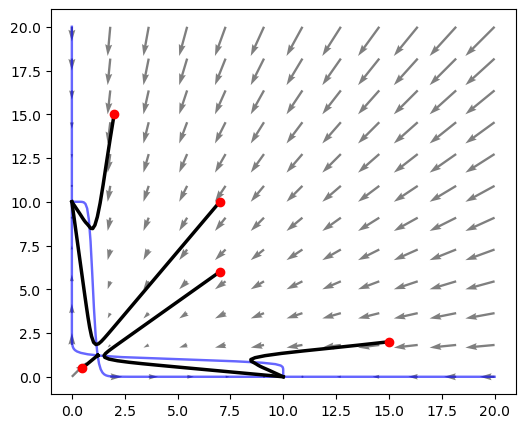

In [16]:
fig = plt.figure(figsize=(6,5)) # initialize figure

# previous elements: vector field and nullclines
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array,alpha=0.5) # quiver: plots vector field

plt.plot(x1list_fine,x2_nullcline_list,'b-',alpha=0.6,linewidth = 1.75)
plt.plot(x1_nullcline_list,x2list_fine,'b-',alpha=0.6,linewidth = 1.75)

# list of initial conditions
x0_list=[np.array([7,10]),np.array([7,6]),np.array([0.5,0.5]),np.array([2,15]),np.array([15,2])]

for x0 in x0_list:
    sol=scint.solve_ivp(toggle_ode, trange, x0, t_eval=tlist,args=(a,b))
    # add trajectory
    plt.plot(sol.y[0,:],sol.y[1,:],'k-',linewidth=2.5)

    # Add a point at initial condition
    plt.plot(sol.y[0,0],sol.y[1,0],'ro',markersize=6)

It appears that the "low 1/high 2" and "high 1/low 2" fixed points are asmptotically stable (i.e., solutions that start in some region about them tend towards them), and that the middle fixed point (equal expression levels of each gene) is a saddle point (unstable).

## Toggle Switch with Input

Now consider the same system but with an input that activates gene 2 (by sequestering repressor protein 1):
$$
\frac{dx_1}{dt} = \frac{a}{1 + x_2^b} - x_1 \\ 
\frac{dx_2}{dt} = \frac{a}{1 + x_1^b} - x_2 + I_2
$$

In [5]:
def toggle_ode_input(t,x,a,b,I2):
    x1=x[0] 
    x2=x[1]

    dx1dt=-x1 + a/(1+x2**b)
    dx2dt=-x2 + a/(1+x1**b) + I2


    return np.array([dx1dt,dx2dt])

In [6]:
# Define parameters
a=5
b=5
I2=2

In [6]:
t=0  # MUST define a value of time for calling ode function above, even if it is not used in defining the ODE 

# define range of x1 and x2
x1min=0
x1max=a*2
numptsx1=12 # number of x1 points in grid
x1list=np.linspace(x1min,x1max,numptsx1)

x2min=0
x2max=a*2
numptsx2=12 #number of x2 points in grid
x2list=np.linspace(x2min,x2max,numptsx2)

# meshgrid
x1array,x2array = np.meshgrid(x1list,x2list)
dx1dt_array=np.zeros(x1array.shape)
dx2dt_array=np.zeros(x1array.shape)

In [7]:
# get vector field toggle_ode_input at each point in grid
for i in np.arange(numptsx1):
    for j in np.arange(numptsx2):
        
        #here, F is an array of velocities in x1 and x2 directions    
        F=toggle_ode_input(t,[x1array[i,j],x2array[i,j]],a,b,I2)

        #We fill in these two matrices with the corresponding velocities
        dx1dt_array[i,j]=F[0]
        dx2dt_array[i,j]=F[1]

In [10]:
# nullclines
# need finer grid for plotting nullclines
x1list_fine=np.linspace(x1min,x1max,250)
x2list_fine=np.linspace(x2min,x2max,250)


x2_nullcline_list=a/(1+x1list_fine**b)+I2 ;
x1_nullcline_list=a/(1+x2list_fine**b) ;

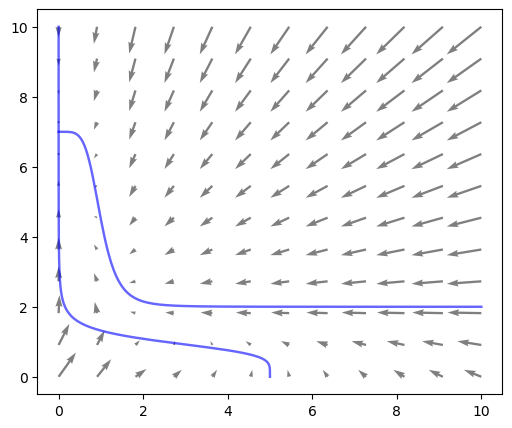

In [11]:
# Plot direction field and nullclines
fig = plt.figure(figsize=(6,5))
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array,alpha=0.5)
plt.plot(x1list_fine,x2_nullcline_list,'b-',alpha=0.6,linewidth = 1.75)
plt.plot(x1_nullcline_list,x2list_fine,'b-',alpha=0.6,linewidth = 1.75)

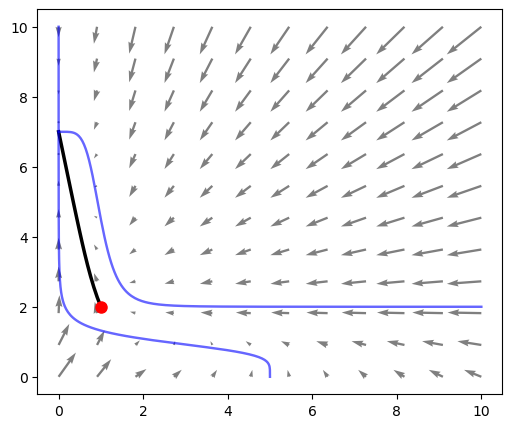

In [14]:
# SOLVE
#specify our initial condition
x0=np.array([1,2])

#specify trange, a time range for simulation: two element array
tstart=0
tend=10
trange=np.array([tstart,tend])

#specify tlist,  a list of time points at which want to return the solution
numt=100
tlist=np.linspace(tstart,tend,numt)

sol=scint.solve_ivp(toggle_ode_input, trange, x0, t_eval=tlist,args=(a,b,I2))

fig = plt.figure(figsize=(6,5))

# add trajectory
plt.plot(sol.y[0,:],sol.y[1,:],'k-',linewidth=2.5)

# Add a point at initial condition
plt.plot(sol.y[0,0],sol.y[1,0],'ro',markersize=8)

#and add quiver, nullclines
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array,alpha=0.5)
plt.plot(x1list_fine,x2_nullcline_list,'b-',alpha=0.6,linewidth = 1.75)
plt.plot(x1_nullcline_list,x2list_fine,'b-',alpha=0.6,linewidth = 1.75)

### Challenge: time-dependent input

What if the input $I_2 = 2$ was "ON" for the first 5 units of time, e.g.,
$$
I_2(t) = \begin{cases} 2 \quad & 0 \leqslant t \leqslant 5 \\ 0 & \text{else} \end{cases}
= 2 \mathbf{1}(t \geqslant 0) \mathbf{1} (t\leqslant 3) = 2 H(t) - 2 H(t-3)\, ,
$$
where $\mathbf{1}$ is the Boolean indicator function and $H$ is the Heaviside step function. How does this affect the trajectories of the system?

In [24]:
def I2_func(t):
    if t >= 0 and t <= 5:
        return 2
    else:
        return 0
    
def toggle_ode_input_pulse(t,x,a,b):
    x1=x[0] 
    x2=x[1]
    
    dx1dt=-x1 + a/(1+x2**b)
    dx2dt=-x2 + a/(1+x1**b) + I2_func(t)

    
    return np.array([dx1dt,dx2dt])

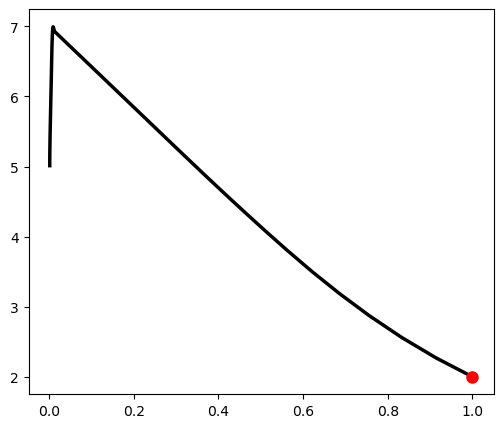

In [25]:
# SOLVE
#specify our initial condition
x0=np.array([1,2])

#specify trange, a time range for simulation: two element array
tstart=0
tend=10
trange=np.array([tstart,tend])

#specify tlist,  a list of time points at which want to return the solution
numt=100
tlist=np.linspace(tstart,tend,numt)

sol=scint.solve_ivp(toggle_ode_input_pulse, trange, x0, t_eval=tlist,args=(a,b))

fig = plt.figure(figsize=(6,5))

# add trajectory
plt.plot(sol.y[0,:],sol.y[1,:],'k-',linewidth=2.5)

# Add a point at initial condition
plt.plot(sol.y[0,0],sol.y[1,0],'ro',markersize=8)

In [26]:
x1list_fine=np.linspace(0,7,250)
x2list_fine=np.linspace(0,7,250)


x2_nullcline_list=a/(1+x1list_fine**b) ;
x1_nullcline_list=a/(1+x2list_fine**b) ;

x2_nullcline_list_I=a/(1+x1list_fine**b)+2 ;
x1_nullcline_list_I=a/(1+x2list_fine**b) ;

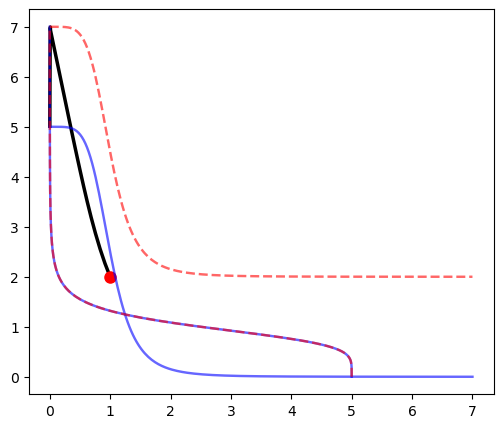

In [28]:
fig = plt.figure(figsize=(6,5))

# add trajectory
plt.plot(sol.y[0,:],sol.y[1,:],'k-',linewidth=2.5)

# Add a point at initial condition
plt.plot(sol.y[0,0],sol.y[1,0],'ro',markersize=8)

# nullclines for no input dynamics
plt.plot(x1list_fine,x2_nullcline_list,'b-',alpha=0.6,linewidth = 1.75)
plt.plot(x1_nullcline_list,x2list_fine,'b-',alpha=0.6,linewidth = 1.75)

# for dyanmics with input present
plt.plot(x1list_fine,x2_nullcline_list_I,'r--',alpha=0.6,linewidth = 1.75)
plt.plot(x1_nullcline_list_I,x2list_fine,'r--',alpha=0.6,linewidth = 1.75)